# Navigation

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [2]:
#env = UnityEnvironment(file_name="Banana_Linux/Banana.x86_64")
env = UnityEnvironment(file_name="Banana.app")


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
brain



Next load the required libraries by running the cell below

In [6]:
import torch
from lib.agents import AgentExperienceReplay, AgentPrioritizedExperienceReplay
from lib.models import QNetwork, DuelingQNetwork

from lib.dqn import dqn

import matplotlib.pyplot as plt
%matplotlib inline

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)


def create_dueling_model(state_size, action_size, seed):
    return DuelingQNetwork(state_size, action_size, seed)

def create_linear_model(state_size, action_size, seed):
    return QNetwork(state_size, action_size, seed)



Number of actions: 4


### Running a single variant of the agent
To run a single variant of the agent run the cell below.



States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37
Episode 100	Average Score: 0.67
Episode 200	Average Score: 4.18
Episode 300	Average Score: 7.75
Episode 400	Average Score: 10.08
Episode 500	Average Score: 11.26
Episode 571	Average Score: 13.14
Environment solved in 471 episodes!	Average Score: 13.14


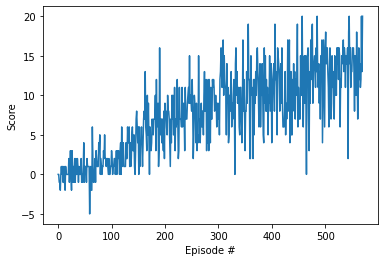

In [7]:

# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)


# Prioritised Experience replay with Linear Network and Double Q learning
# Note:
# - class created AgentExperienceReplay
# - NN model used create_linear_model
# - Double Q-Learning is on (double_dqn=True)
agent_name = 'uniform_experiences_linear_network_double'
agent = AgentExperienceReplay(state_size=state_size, 
                              action_size=action_size, seed=0, 
                              create_model=create_linear_model,
                              double_dqn=True
                                  )
n_episodes=2000
scores = dqn(env, 
             brain_name, 
             agent, 
             n_episodes=n_episodes, 
             checkpoint=13,
             agent_name=agent_name)
agent.save_model(agent_name)


fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()


### Running all variants

To run all variants of the agent run the cell below. Warning! this will take a long time!


Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


prioritized_experiences_dueling_network
Episode 100	Average Score: 0.90
Episode 200	Average Score: 3.53
Episode 300	Average Score: 6.51
Episode 400	Average Score: 9.17
Episode 500	Average Score: 10.19
Episode 600	Average Score: 11.24
Episode 700	Average Score: 12.86
Episode 779	Average Score: 13.00
Environment solved in 679 episodes!	Average Score: 13.00
save not implemented
save not implemented


prioritized_experiences_dueling_network_double
Episode 100	Average Score: 0.47
Episode 200	Average Score: 3.01
Episode 300	Average Score: 6.

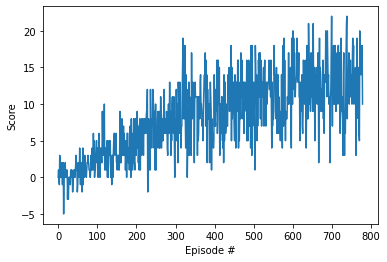


uniform_experiences_linear_network_double



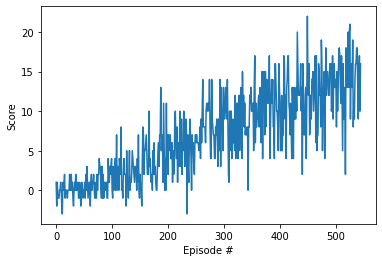


uniform_experiences_linear_network_double



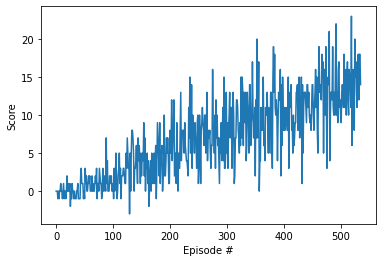


uniform_experiences_linear_network_double



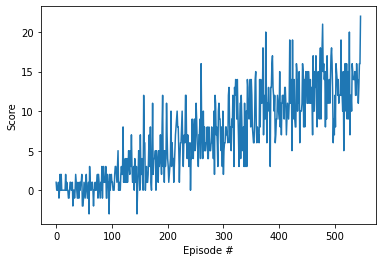


uniform_experiences_linear_network_double



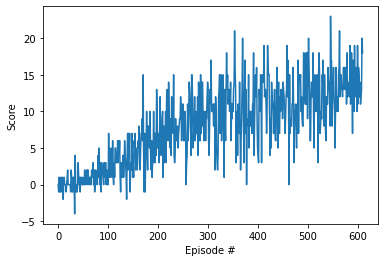


uniform_experiences_linear_network_double



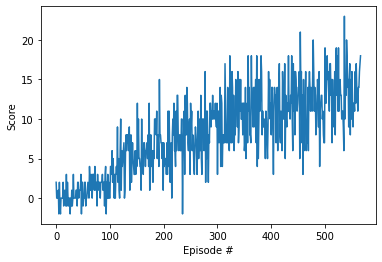


uniform_experiences_linear_network_double



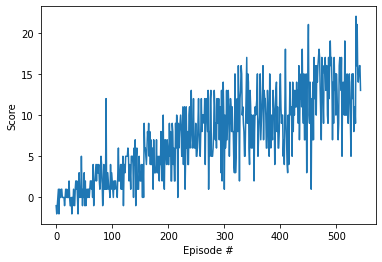


uniform_experiences_linear_network_double



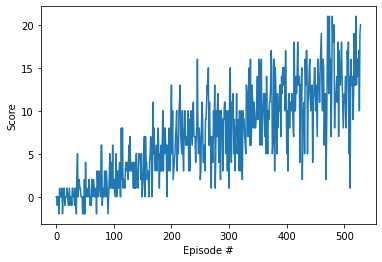

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

n_episodes=2000
scores = []
agent_info = []
# Prioritised Experience replay with Dueling Network
agent = AgentPrioritizedExperienceReplay(state_size=state_size, action_size=action_size, seed=0, 
                                   create_model=create_dueling_model,
                                   double_dqn=False
                                  )
agent_info.append({'agent': agent, 'name': 'prioritized_experiences_dueling_network', 'test': True})

# Prioritised Experience replay with Dueling Network and Double Q learning
agent = AgentPrioritizedExperienceReplay(state_size=state_size, action_size=action_size, seed=0, 
                                   create_model=create_dueling_model,
                                   double_dqn=True
                                  )
agent_info.append({'agent': agent, 'name': 'prioritized_experiences_dueling_network_double', 'test': True})

# Prioritised Experience replay with Linear Network
agent = AgentPrioritizedExperienceReplay(state_size=state_size, action_size=action_size, seed=0, 
                                   create_model=create_linear_model,
                                   double_dqn=False
                                  )
agent_info.append({'agent': agent, 'name': 'prioritized_experiences_linear_network', 'test': True})

# Prioritised Experience replay with Linear Network and Double Q learning
agent = AgentPrioritizedExperienceReplay(state_size=state_size, action_size=action_size, seed=0, 
                                   create_model=create_linear_model,
                                   double_dqn=True
                                  )
agent_info.append({'agent': agent, 'name': 'prioritized_experiences_linear_network_double', 'test': True})

# Experience replay with Dueling Network
agent = AgentExperienceReplay(state_size=state_size, action_size=action_size, seed=0, 
                                   create_model=create_dueling_model,
                                   double_dqn=False
                                  )
agent_info.append({'agent': agent, 'name': 'uniform_experiences_dueling_network', 'test': True})

# Experience replay with Dueling Network and Double Q learning
agent = AgentExperienceReplay(state_size=state_size, action_size=action_size, seed=0, 
                                   create_model=create_dueling_model,
                                   double_dqn=True
                                  )
agent_info.append({'agent': agent, 'name': 'uniform_experiences_dueling_network_double', 'test': True})

# Experience replay with Linear Network
agent = AgentExperienceReplay(state_size=state_size, action_size=action_size, seed=0, 
                                create_model=create_linear_model,
                                double_dqn=False
                                  )
agent_info.append({'agent': agent, 'name': 'uniform_experiences_linear_network', 'test': True})

# Prioritised Experience replay with Linear Network and Double Q learning
agent = AgentExperienceReplay(state_size=state_size, action_size=action_size, seed=0, 
                                create_model=create_linear_model,
                                double_dqn=True
                                  )
agent_info.append({'agent': agent, 'name': 'uniform_experiences_linear_network_double', 'test': True})


for info in agent_info:
    if info["test"]:
        agent_name = info['name']
        print(f"\n\n{agent_name}")
        env_info = env.reset(train_mode=True)[brain_name]
        agent = info['agent']
        scores.append(dqn(env, 
                          brain_name, 
                          agent, 
                          n_episodes=n_episodes, 
                          checkpoint=13,
                          agent_name=agent_name))
        agent.save_model(agent_name)


# plot the scores
for instance_scores in scores:
    print(f"\n{info['name']}\n")
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(np.arange(len(instance_scores)), instance_scores)
    plt.ylabel('Score')
    plt.xlabel('Episode #')
    plt.show()



In [5]:
env.close()
